#### Тестовое задание 1 (часть 1)
Соколова Ирина 09/10/2020

### Показатель Retention 
Напишите функцию для его подсчета

Retention – один из самых важных показателей в компании. Ваша задача – написать функцию, которая будет считать retention игроков (по дням от даты регистрации игрока). Данные лежат в папке shared и имеют следующую структуру:

    shared/problem1-reg_data.csv – данные о времени регистрации
    +-----------+-----+
    |   auth_ts | uid |
    +-----------+-----+
    | 906166566 |   2 |
    | 906344325 |   2 |
    | 906686169 |   2 |
    | 906893386 |   2 |
    | 906980227 |   2 |
    +-----------+-----+
    shared/problem1-auth_data.csv – данные о времени захода пользователей в игру
    +-----------+-----+
    |    reg_ts | uid |
    +-----------+-----+
    | 906166566 |   2 |
    | 924422172 |   3 |
    | 937374732 |   4 |
    | 947425117 |   5 |
    | 955630339 |   6 |
    +-----------+-----+
Функция должна быть написана на python. В ходе решения можно тестировать работу функции как на полном датасете, так и на части (сэмпле) данных.

### Подготовка данных:

    1. Читаем файлы
    2. Объединяем файлы 
    3. ВАЖНО! даты представлены в таблице как int, необходимо перевести их в Unix timestamp, затем datetime64[ns]

### Визуализация:
    Посмотрим на графики регистрации и действий пользователей.
    Видим, что активные действия начались в 2016 году, 
    соответственно при написании функции необходимо учитывать периоды в которые можно будет посмотреть рененшен.
    
### Написание самой функции:

    параметры:
    
    Данные - pd.DataFrame, таблица должна содержать обязательные три колонки:
        df['reg_ts'] - дата регистрации, формат datetime64[ns]
        df['auth_ts'] - дата действия пользователя, формат datetime64[ns]
        df['uid'] - ууникальный номер пользоватеся, формат int
    Функции:      
        df = pf.DataFrame(с обязательными колонками df['reg_ts'] и df['auth_ts'], 
        start = начало периода за который необходимо рассчитывать ретеншен, формат str, пример '2018-01-01' 
        end = окончание периода за который необходимо рассчитывать ретеншен, формат str, пример '2018-01-01'
                          
   #### retention_rate_month(df, start, end) - ретеншен рассчитывается по месячным когортам и месячным интервалам. 
   #### retention_rate(df, start, end) - ретеншен рассчитывается по дневным когортам и дневным интервалам.
                          
    по умолчанию обе функции вернут 31 интервал, например для дневного ретеншен это будет оценка активности пользователей в 1, 2, 3 ... 31 дни. 
    функции возврашают:
            1. таблицы с заданным диапазоном дат и актуальным количеством уникальных пользоватетей в определенные периоды.
            2. визуализацию ретеншен в процентах в определенные периоды.
            3. Retention rate heatmap сохраняется в файл "Retention_Rate_month.png" и "Retention_Rate.png", в зависимости от функции.
                          

                        
                                                                             
        

In [1]:
# необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#ретеншен рассчитывается по месячным когортам и месячным интервалам
def retention_rate_month(df, start, end):
    
    df['reg_ts_month'] = df['reg_ts'].dt.to_period('M')
    df['seniority_month'] = ((df['auth_ts'] - df['reg_ts'])/np.timedelta64(1, 'M')) + 1
    df['seniority_month'] = df['seniority_month'].astype(int)
    
    count_month = df.groupby(['seniority_month', 'reg_ts_month'], as_index=False) \
    .agg({'uid':'nunique'}) \
    .pivot(index='reg_ts_month', columns='seniority_month', values='uid')[start:end]
    
    base_month = count_month[1]    
    retention_month =  count_month.divide(base_month, axis=0).round(3)
   
    plt.figure(figsize=(18,14))
    plt.title('Retention Table')
    ax = sns.heatmap(data=retention_month.iloc[:,0:31], annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
    ax.set_yticklabels(retention_month.index)
    fig=ax.get_figure()
    fig.savefig("Retention_Rate_month.png")
    
    return count_month.iloc[:,0:31] 

In [3]:
#  ретеншен рассчитывается по дневным когортам и дневным интервалам.
def retention_rate(df, start, end):
    df['seniority'] = (df['auth_ts'] - df['reg_ts']).dt.days + 1
    cohort_counts = full_left.groupby(['reg_ts', 'seniority'], as_index = False) \
    .agg({'uid':'nunique'}) \
    .pivot(index='reg_ts', columns='seniority', values='uid')[start:end]

    base = cohort_counts[1]
    retention = cohort_counts.divide(base, axis=0).round(3)
    
    plt.figure(figsize=(18,14))
    plt.title('Retention Table')
    ax = sns.heatmap(data=retention.iloc[:,0:31], annot=True, fmt='.0%', vmin=0.0, vmax=1,cmap='Reds')
    ax.set_yticklabels(retention.index)
    fig=ax.get_figure()
    fig.savefig("Retention_Rate.png")
    
    return cohort_counts.iloc[:,0:31] 

In [5]:
# читаем файлы
file1 = 'problem1-reg_data.csv'
file2 = 'problem1-auth_data.csv'

reg_data = pd.read_csv(file1, sep = ';')
auth_data = pd.read_csv(file2, sep = ';')

In [6]:
# Объединяем файлы используя left join, основной является таблица с дествиями пользователей
full_left = auth_data.merge(reg_data, how = 'left', on = 'uid')

In [7]:
full_left.shape

(9601013, 3)

In [8]:
full_left.tail()

,auth_ts,uid,reg_ts
9601008,1600874034,1110618,1600874034
9601009,1600874086,1110619,1600874086
9601010,1600874139,1110620,1600874139
9601011,1600874191,1110621,1600874191
9601012,1600874244,1110622,1600874244


In [9]:
full_left.dtypes

auth_ts    int64
uid        int64
reg_ts     int64
dtype: object

In [10]:
# переводим данные о времени события в Timestamp
full_left['reg_ts'] = [pd.Timestamp(x,unit='s').date() for x in full_left['reg_ts']]
full_left['auth_ts'] = [pd.Timestamp(x,unit='s').date() for x in full_left['auth_ts']]

In [11]:
# переводим данные о времени события в datetime64[ns]
full_left['auth_ts'] = pd.to_datetime(full_left['auth_ts'])
full_left['reg_ts'] = pd.to_datetime(full_left['reg_ts'])

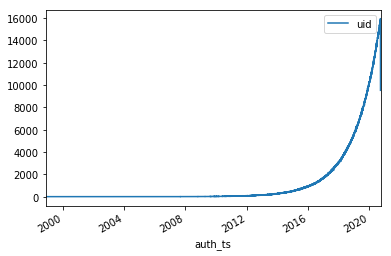

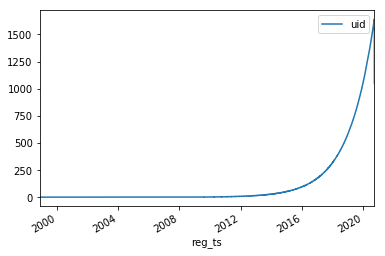

In [12]:
# посмотрим на график регитраций и активности
full_left.groupby('auth_ts').agg({'uid':'nunique'}).plot()
full_left.groupby('reg_ts').agg({'uid':'nunique'}).plot()

seniority_month,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
reg_ts_month,,,,,,,,,,,,,,,,,,,,,
2018-01,10156.0,1021.0,488.0,488.0,488.0,488.0,488.0,488.0,488.0,488.0,...,488.0,488.0,488.0,488.0,488.0,488.0,488.0,488.0,488.0,488.0
2018-02,9630.0,989.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,...,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0,491.0
2018-03,11191.0,1163.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,...,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,571.0,393.0
2018-04,11387.0,1178.0,602.0,602.0,602.0,602.0,602.0,602.0,602.0,602.0,...,602.0,602.0,602.0,602.0,602.0,602.0,602.0,602.0,424.0,NaN
2018-05,12372.0,1321.0,632.0,632.0,632.0,632.0,632.0,632.0,632.0,632.0,...,632.0,632.0,632.0,632.0,632.0,632.0,632.0,462.0,NaN,NaN
2018-06,12588.0,1318.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,660.0,...,660.0,660.0,660.0,660.0,660.0,660.0,473.0,NaN,NaN,NaN
2018-07,13678.0,1382.0,655.0,655.0,655.0,655.0,655.0,655.0,655.0,655.0,...,655.0,655.0,655.0,655.0,655.0,453.0,NaN,NaN,NaN,NaN
2018-08,14392.0,1441.0,701.0,701.0,701.0,701.0,701.0,701.0,701.0,701.0,...,701.0,701.0,701.0,701.0,479.0,NaN,NaN,NaN,NaN,NaN
2018-09,14645.0,1446.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,732.0,...,732.0,732.0,732.0,501.0,NaN,NaN,NaN,NaN,NaN,NaN


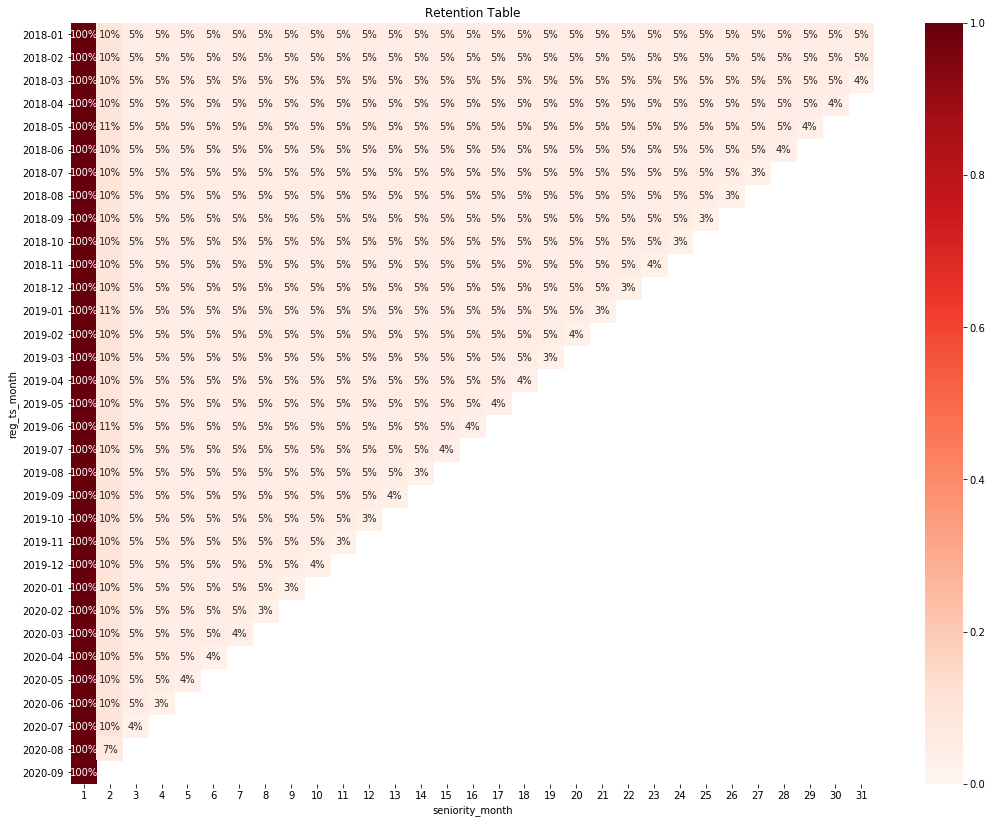

In [13]:
# посмотрим ретеншен по месяцам с начала 2018 года
retention_rate_month(full_left, '2018-01-01', '2020-09-23' )

seniority,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
reg_ts,,,,,,,,,,,,,,,,,,,,,
2020-09-01,1586.0,32.0,65.0,67.0,73.0,102.0,89.0,102.0,65.0,86.0,...,69.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-02,1588.0,40.0,62.0,74.0,90.0,99.0,113.0,100.0,77.0,65.0,...,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-03,1591.0,37.0,86.0,75.0,104.0,111.0,136.0,101.0,87.0,100.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-04,1593.0,32.0,58.0,58.0,82.0,102.0,116.0,79.0,85.0,69.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-05,1596.0,44.0,63.0,74.0,87.0,94.0,119.0,78.0,81.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-06,1599.0,50.0,69.0,87.0,90.0,94.0,109.0,97.0,93.0,88.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-07,1601.0,47.0,68.0,86.0,81.0,102.0,117.0,84.0,66.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-08,1604.0,28.0,63.0,63.0,78.0,122.0,121.0,106.0,83.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-09-09,1607.0,28.0,52.0,75.0,92.0,107.0,92.0,95.0,70.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


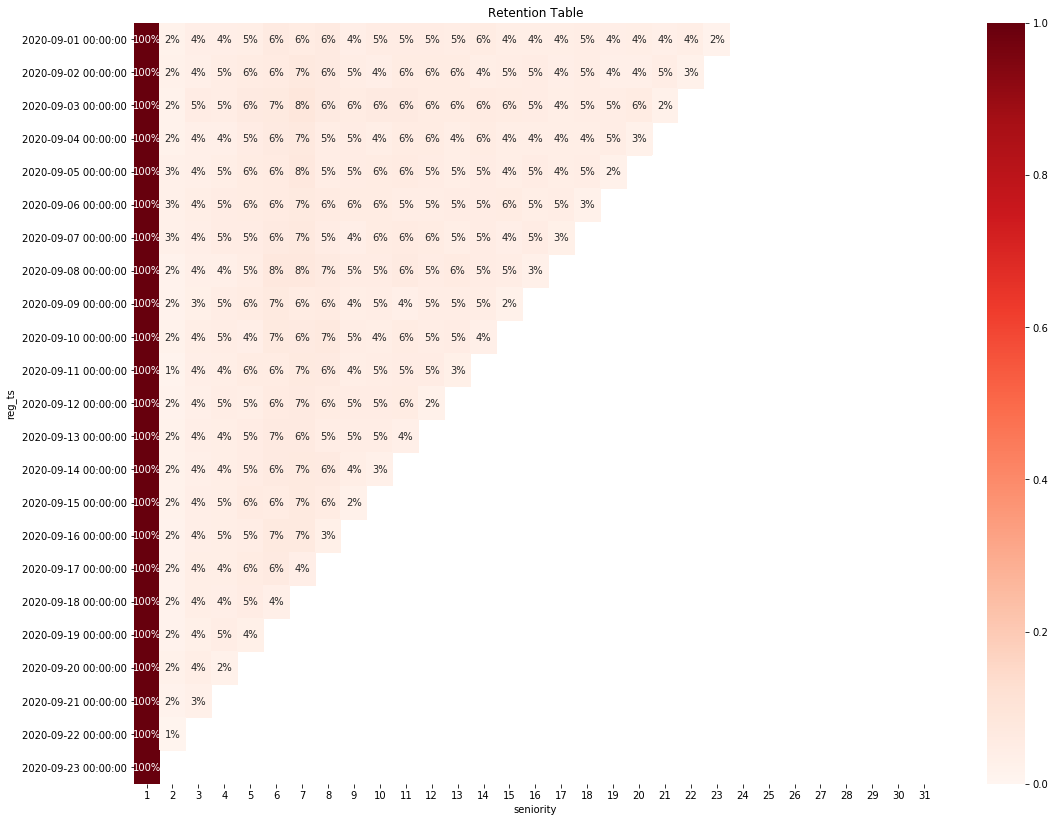

In [14]:
# ретеншен за сентябрь 2020 года
retention_rate(full_left, '2020-09-01','2020-09-23')